<a href="https://colab.research.google.com/github/csds438-f21-project/ray-graph/blob/main/Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from sklearn import cluster
import numpy as np
# import networkx as nx

In [110]:
def create_matrix(n_nodes, max_degree, sparsity=0.5):
  rng = np.random.default_rng()
  binom = rng.binomial(1, p=1 - sparsity, size=(n_nodes, n_nodes))
  mat = rng.integers(1, max_degree + 1, size=(n_nodes, n_nodes))
  mat = np.triu(mat * binom, k=1)
  return np.maximum(mat, mat.T)

def compute_labels(matrix, n_clusters):
  sc = cluster.SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
  sc.fit(matrix)
  return sc.labels_

def draw_clusters(matrix, labels):
  network = nx.from_numpy_array(matrix)
  nx.draw(network, node_color=labels)

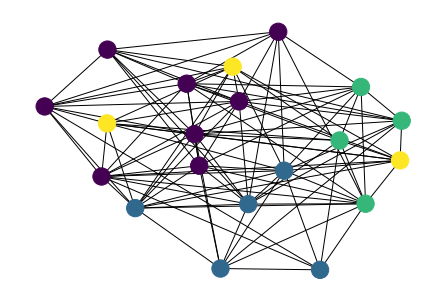

In [117]:
n_nodes = 20
n_clusters = 4
matrix = create_matrix(n_nodes, 3, sparsity=0.5)
clusters = compute_labels(matrix, n_clusters)
draw_clusters(matrix, clusters)

In [6]:
from evaluation import synthetic
from sharetrace.search import KdTreeContactSearch
import numpy as np

In [2]:
histories = synthetic.load_histories(10)

2021-11-05 11:59:42,043 DEBUG synthetic | Loading 10 location histories


In [8]:
kwargs = {'min_dur': np.timedelta64(15, 'm'), 'workers': -1}
tree = KdTreeContactSearch(**kwargs)

2021-11-05 12:02:59,684 DEBUG base | KdTreeContactSearch parameters: {'min_dur': '15 minutes', 'workers': '-1', 'r': '0.0001', 'leaf_size': '10', 'eps': '1e-05', 'p': '2'}


In [9]:
locs = tree.to_coordinates(histories)
idx = tree.index(locs)
pairs = tree.query_pairs(np.concatenate(locs))

2021-11-05 12:03:44,586 DEBUG tree | Constructing a k-d tree spatial index
2021-11-05 12:03:44,587 DEBUG tree | Querying for pairs


In [69]:
user_idx, loc_idx = idx[:, 0], idx[:, 1]
users = user_idx[pairs]
locs = loc_idx[pairs]

# selected = hists[user_idx[pairs]]
# users, locs = locs[:, 0], locs[:, 1]
# names = histories['name'][users]
# locs = histories['locs'][users, locs]

In [71]:

p_110 = np.flatnonzero((users[:,0] == 0) * (users[:,1] == 9))
p_110

array([  0,  61,  94, 145, 216, 233, 274, 316, 370, 434])

In [81]:
# np.flatnonzero(locs[:,0] == 0)
loc_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])